Тема “Обучение без учителя”
Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [348]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [349]:
feature_names = boston["feature_names"]
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [350]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [351]:
target = boston["target"]
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [352]:
y = pd.DataFrame(target, columns=["target"])
y

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [353]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [354]:
 y_test

,target
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
...,...
412,17.9
436,9.6
411,17.2
86,22.5


In [355]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [356]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne_scaled = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne_scaled.shape))

До:	(404, 13)
После:	(404, 2)


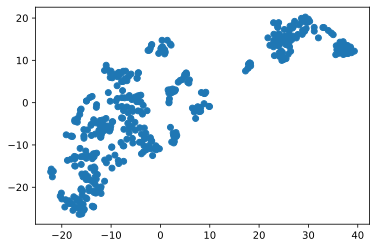

In [357]:
plt.scatter(X_train_tsne_scaled[:, 0], X_train_tsne_scaled[:, 1])

plt.show()

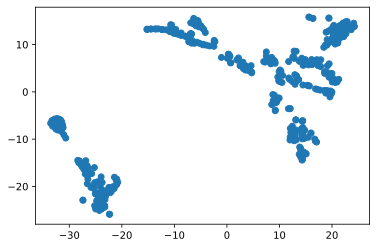

In [358]:
X_train_tsne_not_scaled = tsne.fit_transform(X_train)
plt.scatter(X_train_tsne_not_scaled[:, 0], X_train_tsne_not_scaled[:, 1])

plt.show()

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


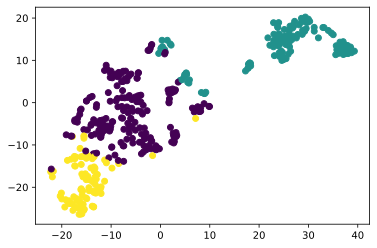

In [359]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train_scaled = kmeans.fit_predict(X_train_scaled)

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train_scaled)

plt.show()

In [360]:
print('Средние значения price:')
print('Кластер 0: {}'.format(y_train[labels_train_scaled == 0].mean()))
print('Кластер 1: {}'.format(y_train[labels_train_scaled == 1].mean()))
print('Кластер 2: {}'.format(y_train[labels_train_scaled == 2].mean()))
print('Средние значения CRIM:')
print('Кластер 0: {}'.format(X_train.loc[labels_train_scaled == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train_scaled == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train_scaled == 2, 'CRIM'].mean()))

Средние значения price:
Кластер 0: target    24.958115
dtype: float64
Кластер 1: target    16.165354
dtype: float64
Кластер 2: target    27.788372
dtype: float64
Средние значения CRIM:
Кластер 0: 0.42166020942408367
Кластер 1: 10.797028425196853
Кластер 2: 0.07356558139534886


*Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


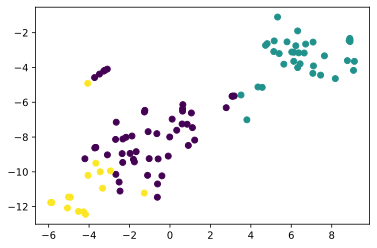

In [361]:

labels_test_scaled = kmeans.predict(X_test_scaled)

X_test_tsne = tsne.fit_transform(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test_scaled)

plt.show()


In [362]:
print('Кластер 0 price: {}'.format(y_test[labels_test_scaled == 0].mean()))
print('Кластер 1 price: {}'.format(y_test[labels_test_scaled == 1].mean()))
print('Кластер 2 price: {}'.format(y_test[labels_test_scaled == 2].mean()))
print('Кластер 0 CRIM: {}'.format(X_test.loc[labels_test_scaled == 0, 'CRIM'].mean()))
print('Кластер 1 CRIM: {}'.format(X_test.loc[labels_test_scaled == 1, 'CRIM'].mean()))
print('Кластер 2 CRIM: {}'.format(X_test.loc[labels_test_scaled == 2, 'CRIM'].mean()))


Кластер 0 price: target    21.860784
dtype: float64
Кластер 1 price: target    16.437143
dtype: float64
Кластер 2 price: target    31.35
dtype: float64
Кластер 0 CRIM: 0.26607882352941176
Кластер 1 CRIM: 10.165531142857143
Кластер 2 CRIM: 0.062060000000000004


In [363]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

y_test_pred = lr.predict(X_test_scaled)

r2_score(y_test, y_test_pred)

0.668759493535632

In [364]:
lr.fit(X_train_scaled.loc[labels_train_scaled == 0], y_train[labels_train_scaled == 0])

y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test_scaled == 0])

r2_score(y_test[labels_test_scaled == 0], y_test_pred_0)

0.7215240423132003

In [365]:
lr.fit(X_train_scaled.loc[labels_train_scaled == 1], y_train[labels_train_scaled == 1])

y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test_scaled == 1])

r2_score(y_test[labels_test_scaled == 1], y_test_pred_1)

0.5231457727131807

In [366]:
lr.fit(X_train_scaled.loc[labels_train_scaled == 2], y_train[labels_train_scaled == 2])

y_test_pred_2 = lr.predict(X_test_scaled.loc[labels_test_scaled == 2])

r2_score(y_test[labels_test_scaled == 2], y_test_pred_2)

0.9155161972050826

In [368]:
y_test_all = np.vstack([y_test[labels_test_scaled == 0], y_test[labels_test_scaled == 1],y_test[labels_test_scaled == 2]])
y_test_pred_all = np.vstack([y_test_pred_0, y_test_pred_1, y_test_pred_2])

r2_score(y_test_all, y_test_pred_all)


0.7955122353798909